In [50]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as plt

In [51]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'



In [33]:
df = pd.read_csv(url, sep=";")
df.head()


,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [36]:
df.describe()

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
count,6000.000000,6000.000000,6000.000000
mean,0.492000,104.712167,4.512833
std,0.499978,24.225196,6.735730
min,0.000000,33.000000,-39.000000
25%,0.000000,80.000000,0.000000
50%,0.000000,106.000000,3.000000
75%,1.000000,112.000000,7.000000
max,1.000000,151.000000,64.000000


In [37]:
df.isna().sum()

TurId                                        0
Dato                                         0
Fylke                                        0
Område                                       0
Kommune                                      0
Holdeplass_Fra                               0
Holdeplass_Til                               0
Linjetype                                    0
Linjefylke                                   0
Linjenavn                                    0
Linjeretning                                 0
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra     0
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra      0
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra    0
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra     0
Kjøretøy_Kapasitet                           0
Passasjerer_Ombord                           0
dtype: int64

In [53]:
df["Kommune"].value_counts()

Lillestrøm           1094
Bærum                 724
Lørenskog             525
Ullensaker            358
Asker                 326
Nittedal              274
Gamle Oslo            262
Rælingen              248
Nannestad             236
Alna                  210
Bjerke                199
Enebakk               153
Eidsvoll              144
Stovner               125
Vestre Aker           121
Nes                   117
Grünerløkka           110
Aurskog-Høland         97
Gjerdrum               97
Nordstrand             89
Ullern                 85
Grorud                 77
Sentrum                77
St.Hanshaugen          47
Sagene                 43
Frogner                33
Søndre Nordstrand      30
Nordre Follo           19
Indre Østfold          18
Nordre Aker            18
Lier                   15
Nordmarka              12
Hurdal                 11
Drammen                 6
Name: Kommune, dtype: int64

<AxesSubplot:>

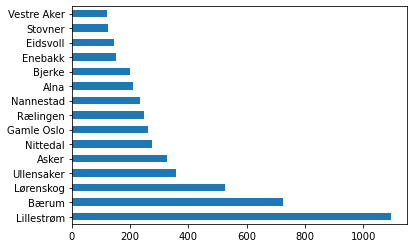

In [68]:
df["Kommune"].value_counts()[:15].plot(kind='barh')
#15 meste brukte

<AxesSubplot:>

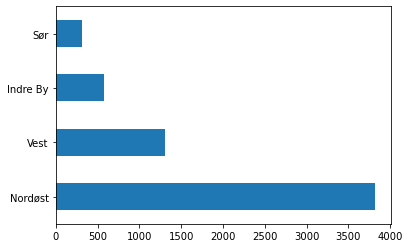

In [71]:
df["Område"].value_counts().plot(kind='barh')

In [75]:
df["Kjøretøy_Kapasitet"].value_counts()

106    1805
112     791
151     690
115     492
105     475
80      452
72      398
130     205
71      193
69      174
75       89
33       68
77       45
76       45
47       39
70       34
103       4
102       1
Name: Kjøretøy_Kapasitet, dtype: int64

<AxesSubplot:>

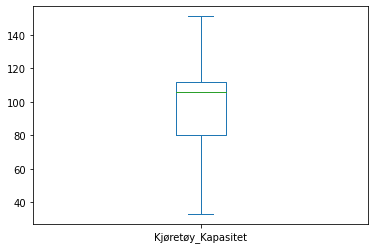

In [76]:
df["Kjøretøy_Kapasitet"].plot.box()


<AxesSubplot:>

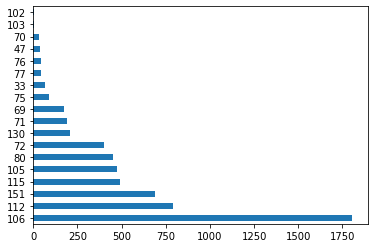

In [77]:
df["Kjøretøy_Kapasitet"].value_counts().plot(kind='barh')

In [82]:
df["Passasjerer_Ombord"]

0        5
1        5
2        6
3       10
4       10
        ..
5995     2
5996     2
5997     3
5998     5
5999    -5
Name: Passasjerer_Ombord, Length: 6000, dtype: int64

In [94]:
df["Passasjerer_Ombord"].value_counts()

 0     957
 1     590
 2     529
 3     445
 4     417
      ... 
 42      1
 40      1
-39      1
 35      1
-34      1
Name: Passasjerer_Ombord, Length: 70, dtype: int64

In [107]:
#df["Passasjerer_Ombord"] = [(i>0)*i for i in df["Passasjerer_Ombord"]]
df["Passasjerer_Ombord"]=df["Passasjerer_Ombord"].clip(lower=0)
#remove negative numbers 

In [108]:
df["Passasjerer_Ombord"].value_counts()

0     1624
1      590
2      529
3      445
4      417
5      380
6      305
7      261
8      212
9      192
10     142
11     138
12     127
14      95
13      94
16      71
15      67
17      53
18      50
19      34
22      27
20      21
23      20
21      14
24      12
25      10
31       9
28       9
29       7
30       6
33       6
26       6
34       3
27       3
39       3
38       3
45       2
37       2
52       2
36       2
64       2
32       2
35       1
42       1
40       1
Name: Passasjerer_Ombord, dtype: int64

<AxesSubplot:>

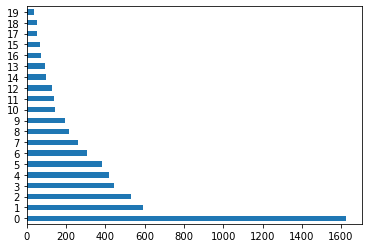

In [112]:

df["Passasjerer_Ombord"].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

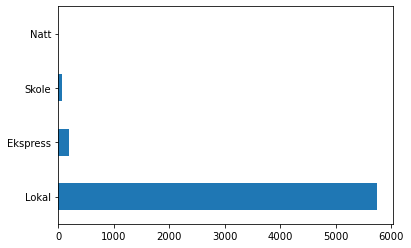

In [113]:
df["Linjetype"].value_counts().plot(kind='barh')